# 1. Create a random noise color and grayscale image. You can set your own width and height, but keep the total number of pixels of both images identical.

In [116]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

if not cv.useOptimized():
    cv.useOptimized(True)

cv.useOptimized()

True

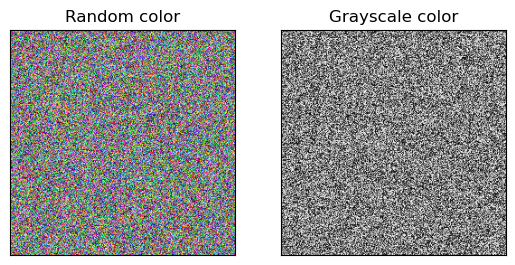

In [118]:
height = 250
width = 250

color = np.random.randint(0, 256, (height, width, 3), dtype=np.uint8)
gray = np.random.randint(0, 256, (height, width), dtype=np.uint8)

plt.subplot(121)
plt.imshow(color)
plt.title("Random color")
plt.xticks([]), plt.yticks([]) 

plt.subplot(122)
plt.imshow(gray, cmap=plt.cm.gray)
plt.title("Grayscale color")
plt.xticks([]), plt.yticks([]) 
plt.show()

# 2. Convert the code chunk found under section Divide an image into smaller patches using cropping into a function with the following signature:
 crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)
 
  -img is the source image
  
  -num_horizontal_grid and num_vertical_grid are the number of patches along x and y axes.
  
  -line_color is the color of the grid line.
  
  -The output of the function should be image with grids

In [105]:
from utils import display_image
def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):
    
    img = cv.imread(img)
    img_copy = img.copy()

    h, w = img.shape[:2]
    vertical = num_vertical_grid  
    horizontal = num_horizontal_grid 

    M = int(h / vertical)
    N = int(w / horizontal)

    tiles = []
    
    for y in range(0, h, M):
        for x in range(0, w, N):
            x1 = x + N
            y1 = y + M

            if x1 > w and y1 > h:
                x1 = w - 1
                y1 = h - 1
                cv.rectangle(img_copy, (x,y), (x1,y1), line_color, 1)
                tile = img[y:h, x:w]
                tiles.append(tile)

            elif y1 > h:
                y1 = h - 1
                cv.rectangle(img_copy, (x,y), (x1,y1), line_color, 1)
                tile = img[y:h, x:x1]
                tiles.append(tile)

            elif x1 > w:
                x1 = w - 1
                cv.rectangle(img_copy, (x,y), (x1,y1), line_color, 1)
                tile = img[y:y1, x:w]
                tiles.append(tile)

            else:
                cv.rectangle(img_copy, (x,y), (x1,y1), line_color, 1)
                tile = img[y:y1, x:x1]
                tiles.append(tile)

    display_image("crop", img_copy)


In [107]:
crop_grid("images/dog.jfif", 3, 3, (0,3,0))

# 3.How would you change the brightness of a color image? Suggest two ways to perform the image processing operations. Implement your methods by providing the example codes. You are free to choose any image.

In [128]:
# method 1: hsv
image = cv.imread("images/car.jpg")

# Convert the image from BGR to HSV
image_hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Split the HSV channels
hue, saturation, value = cv.split(image_hsv)

# Create a new value channel with increased brightness
new_value = np.full_like(value, 100, dtype=np.uint8)

# Merge the channels back together
adjusted_hsv = cv.merge((hue, saturation, new_value))

# Convert the image back to BGR
adjusted_image = cv.cvtColor(adjusted_hsv, cv.COLOR_HSV2BGR)

# Display the original and adjusted images
display_images([image, adjusted_image], ("Original", "Brightness Adjusted (HSV)"))


In [138]:
# method 2: point operator

def adjust_brightness(img, gain, offset):
 
    # Convert image to float for accurate manipulation
    float_img = img.astype(np.float32)
    
    # Apply linear transformation
    transformed_img = gain * float_img + offset
    
    # Clip the values to be within valid range [0, 255]
    transformed_img = np.clip(transformed_img, 0, 255)
    
    # Convert back to unsigned 8-bit integer type
    return transformed_img.astype(np.uint8)

# Load the image
image = cv.imread('images/boat.jpg')

# Adjust the brightness using the function
brightness_adjusted_image = adjust_brightness(image, 2, 100)

# Display the original and adjusted images
display_images([image, brightness_adjusted_image], ("Original", "Brightness Adjusted (Linear)"))


# 4. Provide at least one common use cases for the following color spaces:
- RGB
- HSV
- CIELAB

In [ ]:
RGB = Display Technology and Image Storage
HSV = Color Manipulation and Object Detection
